In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek

In [2]:
data_raw = pd.read_csv('forestfires.csv')
data_raw

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data = data_raw[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'size_category']]
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small
...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,small


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  size_category  517 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 44.6+ KB


In [5]:
data['month'].unique()

array(['mar', 'oct', 'aug', 'sep', 'apr', 'jun', 'jul', 'feb', 'jan',
       'dec', 'may', 'nov'], dtype=object)

In [6]:
data['day'].unique()

array(['fri', 'tue', 'sat', 'sun', 'mon', 'wed', 'thu'], dtype=object)

In [7]:
data['size_category'].unique()

array(['small', 'large'], dtype=object)

In [8]:
y = data['size_category']
X = data.drop('size_category', axis = 1)
X_with_dummies = pd.get_dummies(X)
X_scaled = scale(X_with_dummies)

C:\Users\deshp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

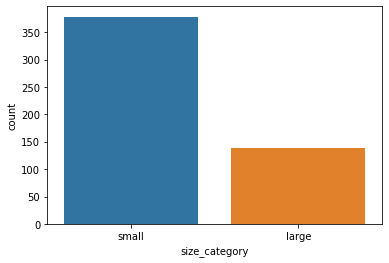

In [9]:
sns.countplot(y)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [11]:
vector = SVC(random_state = 42)
vector.fit(X_train, y_train)

SVC(random_state=42)

In [12]:
predictions = vector.predict(X_test)
np.mean(y_test == predictions)

0.7403846153846154

In [13]:
confusion_matrix(y_test, predictions)

array([[ 2, 26],
       [ 1, 75]], dtype=int64)

# Optimizing SVM

In [14]:
param_grid = {'kernel' : ['rbf'], 'gamma' : [1, 0.1, 0.001, 0.0001, 0.00001], 'C' : [0.5, 1, 100]}
optimal = GridSearchCV(SVC(), param_grid, cv = 10)
optimal.fit(X_scaled, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.5, 1, 100],
                         'gamma': [1, 0.1, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']})

In [15]:
optimal.best_params_ , optimal.best_score_

({'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7311463046757165)

# Resampling the training data

In [16]:
resample = SMOTETomek(random_state = 42)
X_res, y_res = resample.fit_resample(X_scaled, y)
X_res.shape, y_res.shape

((704, 27), (704,))

In [17]:
vector = SVC(C = 0.5, gamma = 0.1)
vector.fit(X_res, y_res)

SVC(C=0.5, gamma=0.1)

In [18]:
predictions = vector.predict(X_test)
np.mean(predictions == y_test)

0.8365384615384616

In [19]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       large       0.72      0.64      0.68        28
       small       0.87      0.91      0.89        76

    accuracy                           0.84       104
   macro avg       0.80      0.78      0.78       104
weighted avg       0.83      0.84      0.83       104



In [20]:
confusion_matrix(y_test, predictions)

array([[18, 10],
       [ 7, 69]], dtype=int64)

C:\Users\deshp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


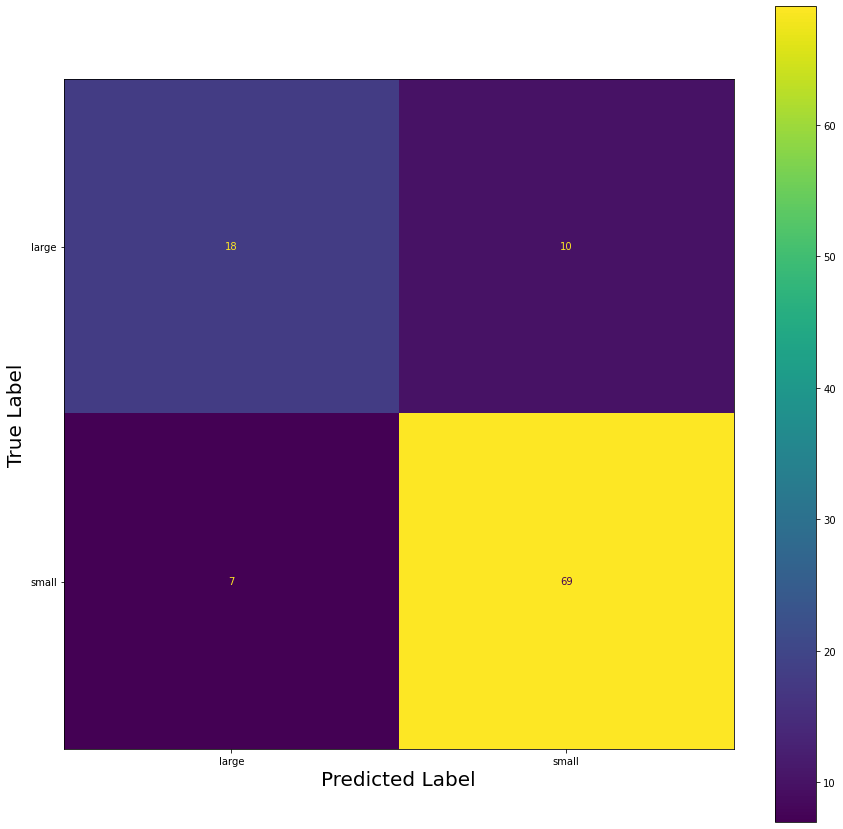

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(vector, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()